In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


In [4]:
data.drop(["Ad Topic Line","Timestamp"],axis = 1, inplace = True)

In [5]:
data['Clicked on Ad'].unique()

array([0, 1], dtype=int64)

In [6]:
gender_data = pd.crosstab(data['Male'], data['Clicked on Ad'])

In [7]:
gender_data.rename({
    0: 'Not Clicked',
    1: 'Clicked'
}, axis =1, inplace=True)

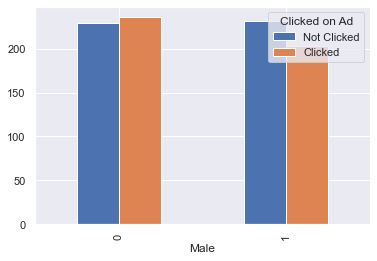

In [8]:
gender_data.plot(kind='bar')

In [9]:
gender_data = gender_data.apply(lambda x: round(100* x/x.sum()))

In [10]:
gender_data

Clicked on Ad,Not Clicked,Clicked
Male,,
0,50.0,54.0
1,50.0,46.0


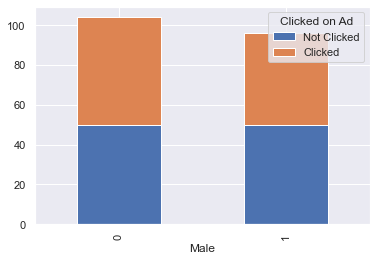

In [11]:
 gender_data.plot(kind='bar', stacked=True)

In [12]:
country_data = pd.crosstab(data['Country'], data['Clicked on Ad'])

In [13]:
country_data.rename({
    0: 'Not Clicked',
    1: 'Clicked'
}, axis =1, inplace=True)

In [14]:
country_data.head()

Clicked on Ad,Not Clicked,Clicked
Country,,
Afghanistan,2,5
Albania,3,3
Algeria,3,3
American Samoa,2,3
Andorra,0,2


In [15]:
country_data.head()

Clicked on Ad,Not Clicked,Clicked
Country,,
Afghanistan,2,5
Albania,3,3
Algeria,3,3
American Samoa,2,3
Andorra,0,2


In [16]:
country_data['total'] = country_data.sum(axis=1)

In [17]:
country_data['total'].head()

Country
Afghanistan       7
Albania           6
Algeria           6
American Samoa    5
Andorra           2
Name: total, dtype: int64

In [18]:
country_data = country_data.apply(lambda x: round(100 * x/country_data['total']))

In [19]:
country_data.head()

Clicked on Ad,Not Clicked,Clicked,total
Country,,,
Afghanistan,29.0,71.0,100.0
Albania,50.0,50.0,100.0
Algeria,50.0,50.0,100.0
American Samoa,40.0,60.0,100.0
Andorra,0.0,100.0,100.0


In [20]:
country_data.drop('total', axis=1, inplace=True)

In [21]:
country_data.head()

Clicked on Ad,Not Clicked,Clicked
Country,,
Afghanistan,29.0,71.0
Albania,50.0,50.0
Algeria,50.0,50.0
American Samoa,40.0,60.0
Andorra,0.0,100.0


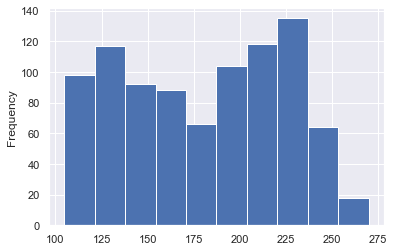

In [22]:
data['Daily Internet Usage'].plot(kind='hist')

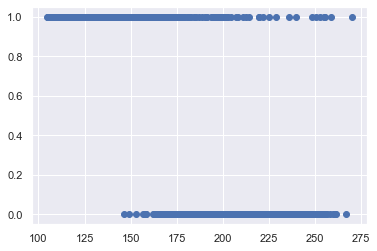

In [23]:
plt.scatter(data['Daily Internet Usage'], data['Clicked on Ad'])

### Modeling

In [24]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data["City"] = label.fit_transform(data["City"])
data["Country"] = label.fit_transform(data["Country"])

In [25]:
x = data.iloc[:,0:7]
y = data.iloc[:,7:8]

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 1/4, random_state = 0)

## Logistic

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty = "l2")

In [28]:
model.fit(x_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
prediction = model.predict(x_test)

In [30]:
from sklearn import datasets, linear_model, metrics 
print("Logistic model accuracy(in %):",  
metrics.accuracy_score(y_test, prediction)*100)

Logistic model accuracy(in %): 91.11111111111111


## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [32]:
knn.fit(x_train, y_train)

<ipython-input-32-fdc926e502f6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=4)

In [33]:
prediction = knn.predict(x_test)

In [34]:
from sklearn import datasets, linear_model, metrics 
print("KNN model accuracy(in %):",  
metrics.accuracy_score(y_test, prediction)*100)

KNN model accuracy(in %): 68.0


## Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [36]:
gnb.fit(x_train,y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [37]:
p = gnb.predict(x_test)

In [38]:
from sklearn import datasets, linear_model, metrics 
print("NB model accuracy(in %):",  
metrics.accuracy_score(y_test, p)*100)

NB model accuracy(in %): 96.44444444444444
